## 라이브러리 

In [15]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


## 데이터 가져오기

In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [25]:
class_names=['T_shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

## 데이터 탐색

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

## 데이터 전처리
- 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정

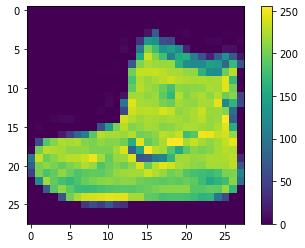

In [19]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [21]:
train_images=train_images/255.0
test_images=test.images/255.0

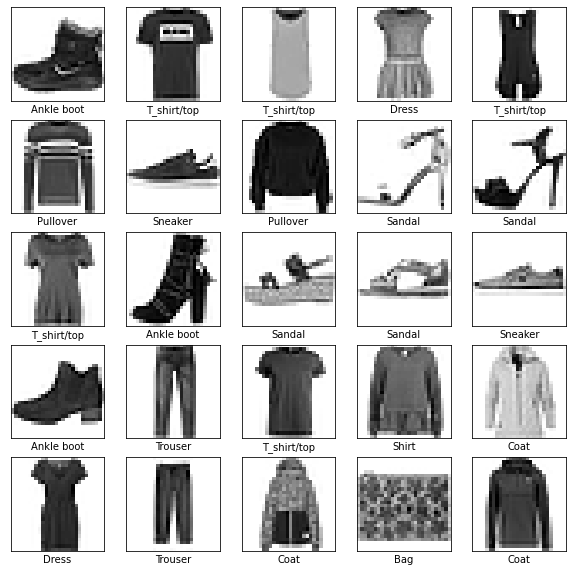

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])  #x축에 아무것도 표시 안함
    plt.yticks([])  #y축에 아무것도 표시 안함
    plt.imshow(train_images[i],cmap=plt.cm.binary)   #컬러맵을 흑백
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성
- 신경망의 기본 구성 요소는 층(layer)
-  tf.keras.layers.Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. -> 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘림
- 픽셀을 펼친 후에는 두 개의 tf.keras.layers.Dense 층이 연속되어 연결됩니다. 
- 모델 컴파일 : 손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. / 옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다./ 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [36]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련
- 모델이 이미지와 레이블을 매핑하는 방법을 배웁 
- 모델이 학습하면서 train-lables와 자신이 예측한 결과값과 비교 

In [38]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6363 - accuracy: 0.7777
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3774 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3363 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3112 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8901


## 정확도 평가

In [56]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 1s - loss: 59.2405 - accuracy: 0.8578


## 예측 모델 만들기

In [57]:
predictions=model.predict(test_images)

In [46]:
predictions[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [49]:
np.argmax(predictions[1])

2

In [58]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


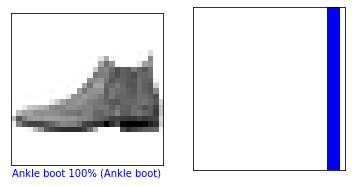

In [59]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

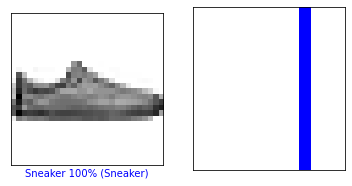

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

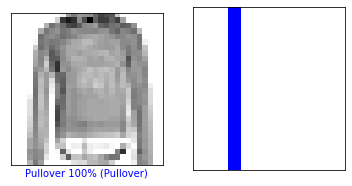

In [60]:
i = 16
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

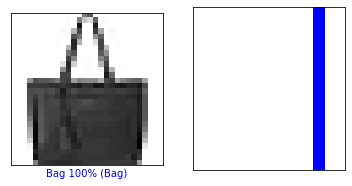

In [61]:
i = 900
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

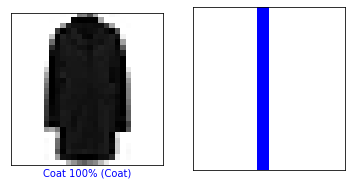

In [62]:
i = 1400
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

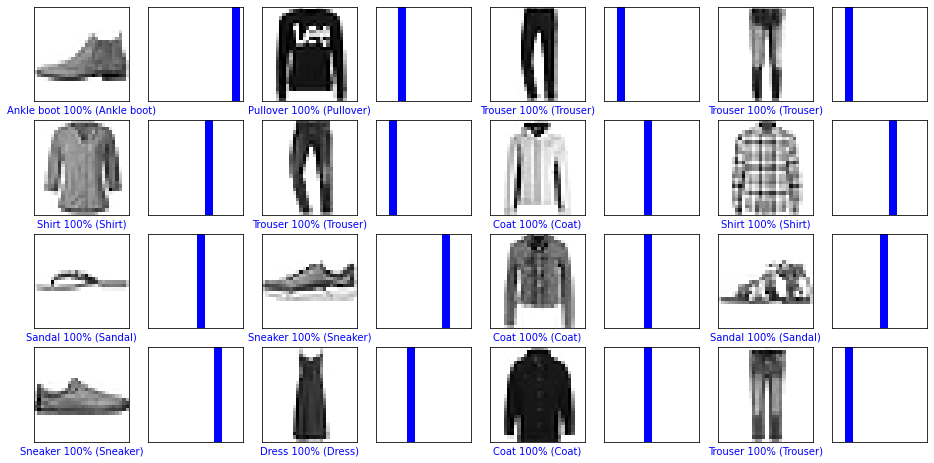

In [71]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [67]:
img = test_images[0]

print(img.shape)

(28, 28)


In [68]:
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

(1, 28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


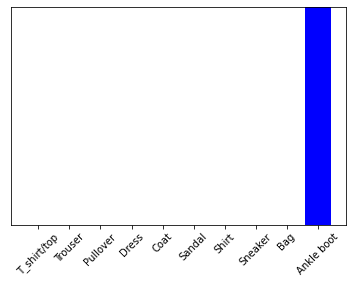

In [69]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)